In [141]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import bemcs

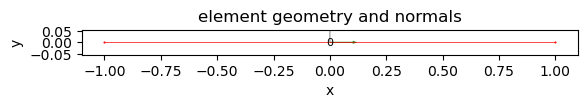

In [142]:
els = bemcs.initialize_els()
els.x1 = np.array([-1.0])
els.y1 = np.array([0.0])
els.x2 = np.array([1.0])
els.y2 = np.array([0.0])
n_els = len(els.x1)

bemcs.standardize_els_geometry(els)
bemcs.plot_els_geometry(els)

coef_s = np.random.random(3)

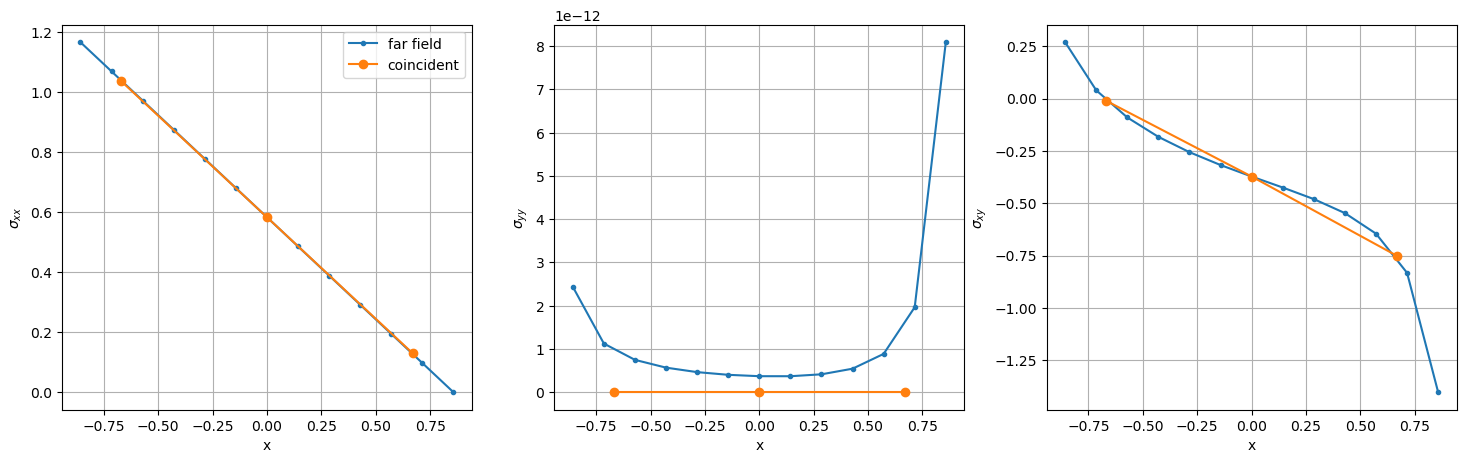

In [143]:
nu = 0.25
mu = 1

nobs = 15
x = np.linspace(-1, 1, nobs)
y = np.zeros_like(x) + 1e-12

# compute coincident and far-field kernels
f_farfield = bemcs.quadratic_kernel_farfield(x, y, els.half_lengths[0], nu)
f_coincident = bemcs.quadratic_kernel_coincident(els.half_lengths[0], nu)

stress_farfield = np.zeros((3, x.size))
stress_coincident = np.zeros((3, 3))

for i in range(0, 3):
    f = f_farfield[:, i, :]
    _, stress = bemcs.f_slip_to_displacement_stress(coef_s[i], 0, f, y, mu, nu)
    stress_farfield += stress

    y_coincident = np.zeros(3)
    f = f_coincident[:, i, :]
    _, stress = bemcs.f_slip_to_displacement_stress(
        coef_s[i], 0, f, y_coincident, mu, nu
    )
    stress_coincident += stress

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(x, stress_farfield[0, :], ".-", label="far field")
plt.plot(np.array([-1, 0, 1]) * 0.67, stress_coincident[0, :], "o-", label="coincident")
plt.xlabel("x")
plt.ylabel("$\sigma_{xx}$")
plt.legend()
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(x, stress_farfield[1, :], ".-")
plt.plot(np.array([-1, 0, 1]) * 0.67, stress_coincident[1, :], "o-")
plt.xlabel("x")
plt.ylabel("$\sigma_{yy}$")
plt.grid()
plt.subplot(1, 3, 3)
plt.plot(x, stress_farfield[2, :], ".-")
plt.plot(np.array([-1, 0, 1]) * 0.67, stress_coincident[2, :], "o-")
plt.xlabel("x")
plt.ylabel("$\sigma_{xy}$")
plt.grid()
plt.show()